In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

dir_path = os.path.abspath(os.path.join(os.path.dirname(__file__), "..", ".."))
print(dir_path)

df = pd.read_csv(dir_path+ "/Data/CRS_Data/CRS_Data_allyears.csv")

# years 2010 to 2022
df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]

df = df.dropna(subset=['disbursement_national', 'climate_mitigation', 'climate_adaptation'])

print(df)

c:\Users\chloe\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (6,55,57,60,61,62,79,84,85,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        year  donor_code  de_donorcode   donor_name  agency_code  \
342     2018          11           NaN  Switzerland         22.0   
343     2018          11           NaN  Switzerland         22.0   
344     2018          11           NaN  Switzerland         22.0   
345     2018          11           NaN  Switzerland         22.0   
346     2018          11           NaN  Switzerland         22.0   
...      ...         ...           ...          ...          ...   
193995  2022          11           NaN  Switzerland          4.0   
193996  2022          11           NaN  Switzerland          4.0   
193997  2022          11           NaN  Switzerland          4.0   
193998  2022          11           NaN  Switzerland          4.0   
193999  2022          11           NaN  Switzerland          4.0   

                                          agency_name      crs_id  \
342        Swiss Investment Fund for Emerging Markets  2018010406   
343        Swiss Investment Fund for Emerging

In [76]:
# Filter amounts based on Rio Marker values
def get_totals(df, marker_column):
    full = df[df[marker_column] == 2]['disbursement_national'].sum()
    dashed = df[df[marker_column] == 1]['disbursement_national'].sum()
    return full, dashed

mitigation_full, mitigation_dashed = get_totals(df, 'climate_mitigation')
adaptation_full, adaptation_dashed = get_totals(df, 'climate_adaptation')

print(df)

        year  donor_code  de_donorcode   donor_name  agency_code  \
342     2018          11           NaN  Switzerland         22.0   
343     2018          11           NaN  Switzerland         22.0   
344     2018          11           NaN  Switzerland         22.0   
345     2018          11           NaN  Switzerland         22.0   
346     2018          11           NaN  Switzerland         22.0   
...      ...         ...           ...          ...          ...   
193995  2022          11           NaN  Switzerland          4.0   
193996  2022          11           NaN  Switzerland          4.0   
193997  2022          11           NaN  Switzerland          4.0   
193998  2022          11           NaN  Switzerland          4.0   
193999  2022          11           NaN  Switzerland          4.0   

                                          agency_name      crs_id  \
342        Swiss Investment Fund for Emerging Markets  2018010406   
343        Swiss Investment Fund for Emerging

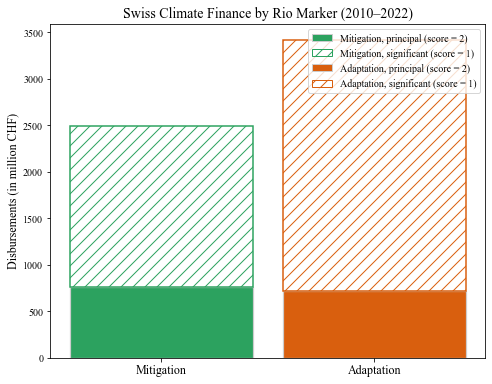

In [ ]:
plt.rcParams['text.usetex'] = False

# colors (from Toeztke et al. (2022))
green = '#2ca25f'
orange = '#d95f0e'
outline_color = '#cccccc'

# plot design
labels = ['Mitigation', 'Adaptation']
full_heights = [mitigation_full, adaptation_full]
dashed_heights = [mitigation_dashed, adaptation_dashed]
colors = [green, orange]

x = [0, 0.7]  
bar_width = 0.6

# bar plot
fig, ax = plt.subplots(figsize=(7, 5.5))
bars1 = ax.bar(x, full_heights, color=colors, edgecolor=outline_color, linewidth=1.2, width=bar_width)
bars2 = ax.bar(x, dashed_heights, bottom=full_heights,
               color='white', edgecolor=colors, linewidth=1.5,
               hatch='//', width=bar_width)

ax.set_ylabel("Disbursements (in million CHF)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_title("Swiss Climate Finance by Rio Marker (2010–2022)", fontsize=14)
legend_elements = [
    mpatches.Patch(facecolor=green, edgecolor=outline_color, label='Mitigation, principal (score = 2)'),
    mpatches.Patch(facecolor='white', edgecolor=green, hatch='//', label='Mitigation, significant (score = 1)'),
    mpatches.Patch(facecolor=orange, edgecolor=outline_color, label='Adaptation, principal (score = 2)'),
    mpatches.Patch(facecolor='white', edgecolor=orange, hatch='//', label='Adaptation, significant (score = 1)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("climate_finance.png", dpi=300, bbox_inches='tight')  
plt.show()

In [ ]:
# projects with at least one Rio marker
df = df[(df['climate_mitigation'].isin([1, 2])) | (df['climate_adaptation'].isin([1, 2]))]
total_projects = df.shape[0]
total_disbursement = df['disbursement_national'].sum()

# adaptation only
adaptation_only = df[
    df['climate_adaptation'].isin([1, 2]) & ~df['climate_mitigation'].isin([1, 2])
]
adaptation_only_count = adaptation_only.shape[0]
adaptation_only_disb = adaptation_only['disbursement_national'].sum()

# mitigation only
mitigation_only = df[
    df['climate_mitigation'].isin([1, 2]) & ~df['climate_adaptation'].isin([1, 2])
]
mitigation_only_count = mitigation_only.shape[0]
mitigation_only_disb = mitigation_only['disbursement_national'].sum()

# both adaptation & mitigation
both = df[
    df['climate_mitigation'].isin([1, 2]) & df['climate_adaptation'].isin([1, 2])
]
both_count = both.shape[0]
both_disb = both['disbursement_national'].sum()

# averages
avg_adaptation = adaptation_only_disb / adaptation_only_count if adaptation_only_count else 0
avg_mitigation = mitigation_only_disb / mitigation_only_count if mitigation_only_count else 0
avg_both = both_disb / both_count if both_count else 0

# summary
summary = f"""From all Swiss ODA projects (2010–2022), {total_projects} projects with Rio markers were identified, 
amounting to {total_disbursement / 1000:.2f} billion CHF. Of these:
- {adaptation_only_count} projects had only adaptation markers, totaling {adaptation_only_disb / 1000:.2f} billion CHF (avg: {avg_adaptation:.2f} million CHF),
- {mitigation_only_count} had only mitigation markers, totaling {mitigation_only_disb / 1000:.2f} billion CHF (avg: {avg_mitigation:.2f} million CHF),
- {both_count} had both adaptation and mitigation markers, totaling {both_disb / 1000:.2f} billion CHF (avg: {avg_both:.2f} million CHF)."""

print(summary)


From all Swiss ODA projects (2010–2022), 14161 projects with Rio markers were identified, 
amounting to 4.60 billion CHF. Of these:
- 7235 projects had only adaptation markers, totaling 2.11 billion CHF (avg: 0.29 million CHF),
- 2403 had only mitigation markers, totaling 1.18 billion CHF (avg: 0.49 million CHF),
- 4523 had both adaptation and mitigation markers, totaling 1.31 billion CHF (avg: 0.29 million CHF).


In [ ]:
#SDC projects only
df_sdc=df[
    (df['agency_code'] == 4)
]

def get_totals(df_sdc, marker_column):
    full = df_sdc[df_sdc[marker_column] == 2]['disbursement_national'].sum()
    dashed = df_sdc[df_sdc[marker_column] == 1]['disbursement_national'].sum()
    return full, dashed

mitigation_full, mitigation_dashed = get_totals(df_sdc, 'climate_mitigation')
adaptation_full, adaptation_dashed = get_totals(df_sdc, 'climate_adaptation')

print(df_sdc)

        year  donor_code  de_donorcode   donor_name  agency_code  \
7507    2012          11           NaN  Switzerland          4.0   
55052   2015          11           NaN  Switzerland          4.0   
55097   2015          11           NaN  Switzerland          4.0   
55361   2015          11           NaN  Switzerland          4.0   
55365   2015          11           NaN  Switzerland          4.0   
...      ...         ...           ...          ...          ...   
193977  2022          11           NaN  Switzerland          4.0   
193978  2022          11           NaN  Switzerland          4.0   
193979  2022          11           NaN  Switzerland          4.0   
193988  2022          11           NaN  Switzerland          4.0   
193989  2022          11           NaN  Switzerland          4.0   

                                          agency_name      crs_id  \
7507    Swiss Agency for Development and Co-operation  1996001932   
55052   Swiss Agency for Development and Co-o

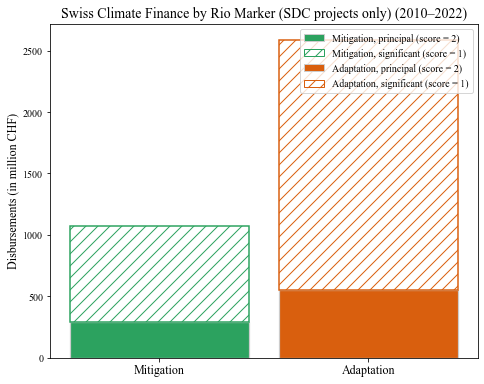

In [ ]:
plt.rcParams['text.usetex'] = False

# colors (from Toeztke et al. (2022))
green = '#2ca25f'
orange = '#d95f0e'
outline_color = '#cccccc'


labels = ['Mitigation', 'Adaptation']
full_heights = [mitigation_full, adaptation_full]
dashed_heights = [mitigation_dashed, adaptation_dashed]
colors = [green, orange]

x = [0, 0.7]  
bar_width = 0.6

# plot
fig, ax = plt.subplots(figsize=(7, 5.5))
bars1 = ax.bar(x, full_heights, color=colors, edgecolor=outline_color, linewidth=1.2, width=bar_width)
bars2 = ax.bar(x, dashed_heights, bottom=full_heights,
               color='white', edgecolor=colors, linewidth=1.5,
               hatch='//', width=bar_width)
ax.set_ylabel("Disbursements (in million CHF)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_title("Swiss Climate Finance by Rio Marker (SDC projects only) (2010–2022)", fontsize=14)
legend_elements = [
    mpatches.Patch(facecolor=green, edgecolor=outline_color, label='Mitigation, principal (score = 2)'),
    mpatches.Patch(facecolor='white', edgecolor=green, hatch='//', label='Mitigation, significant (score = 1)'),
    mpatches.Patch(facecolor=orange, edgecolor=outline_color, label='Adaptation, principal (score = 2)'),
    mpatches.Patch(facecolor='white', edgecolor=orange, hatch='//', label='Adaptation, significant (score = 1)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("climate_finance_SDC.png", dpi=300, bbox_inches='tight')  
plt.show()

In [ ]:
# SDC projects with at least one Rio marker
df_sdc = df_sdc[(df_sdc['climate_mitigation'].isin([1, 2])) | (df_sdc['climate_adaptation'].isin([1, 2]))]
total_projects = df_sdc.shape[0]
total_disbursement = df_sdc['disbursement_national'].sum()

# adaptation only
adaptation_only = df_sdc[
    df_sdc['climate_adaptation'].isin([1, 2]) & ~df_sdc['climate_mitigation'].isin([1, 2])
]
adaptation_only_count = adaptation_only.shape[0]
adaptation_only_disb = adaptation_only['disbursement_national'].sum()

# mitigation only
mitigation_only = df_sdc[
    df_sdc['climate_mitigation'].isin([1, 2]) & ~df_sdc['climate_adaptation'].isin([1, 2])
]
mitigation_only_count = mitigation_only.shape[0]
mitigation_only_disb = mitigation_only['disbursement_national'].sum()

# both adaptation & mitigation
both = df_sdc[
    df_sdc['climate_mitigation'].isin([1, 2]) & df_sdc['climate_adaptation'].isin([1, 2])
]
both_count = both.shape[0]
both_disb = both['disbursement_national'].sum()

# averages
avg_adaptation = adaptation_only_disb / adaptation_only_count if adaptation_only_count else 0
avg_mitigation = mitigation_only_disb / mitigation_only_count if mitigation_only_count else 0
avg_both = both_disb / both_count if both_count else 0

# summary
summary = f"""From all SDC projects (2010–2022), {total_projects} projects with Rio markers were identified, 
amounting to {total_disbursement / 1000:.2f} billion CHF. Of these:
- {adaptation_only_count} projects had only adaptation markers, totaling {adaptation_only_disb / 1000:.2f} billion CHF (avg: {avg_adaptation:.2f} million CHF),
- {mitigation_only_count} had only mitigation markers, totaling {mitigation_only_disb / 1000:.2f} billion CHF (avg: {avg_mitigation:.2f} million CHF),
- {both_count} had both adaptation and mitigation markers, totaling {both_disb / 1000:.2f} billion CHF (avg: {avg_both:.2f} million CHF)."""

print(summary)


From all SDC projects (2010–2022), 11167 projects with Rio markers were identified, 
amounting to 2.87 billion CHF. Of these:
- 6573 projects had only adaptation markers, totaling 1.80 billion CHF (avg: 0.27 million CHF),
- 1220 had only mitigation markers, totaling 0.28 billion CHF (avg: 0.23 million CHF),
- 3374 had both adaptation and mitigation markers, totaling 0.79 billion CHF (avg: 0.23 million CHF).
